# Clustering Task
 - Divisive Clustering - KMeans Clustering

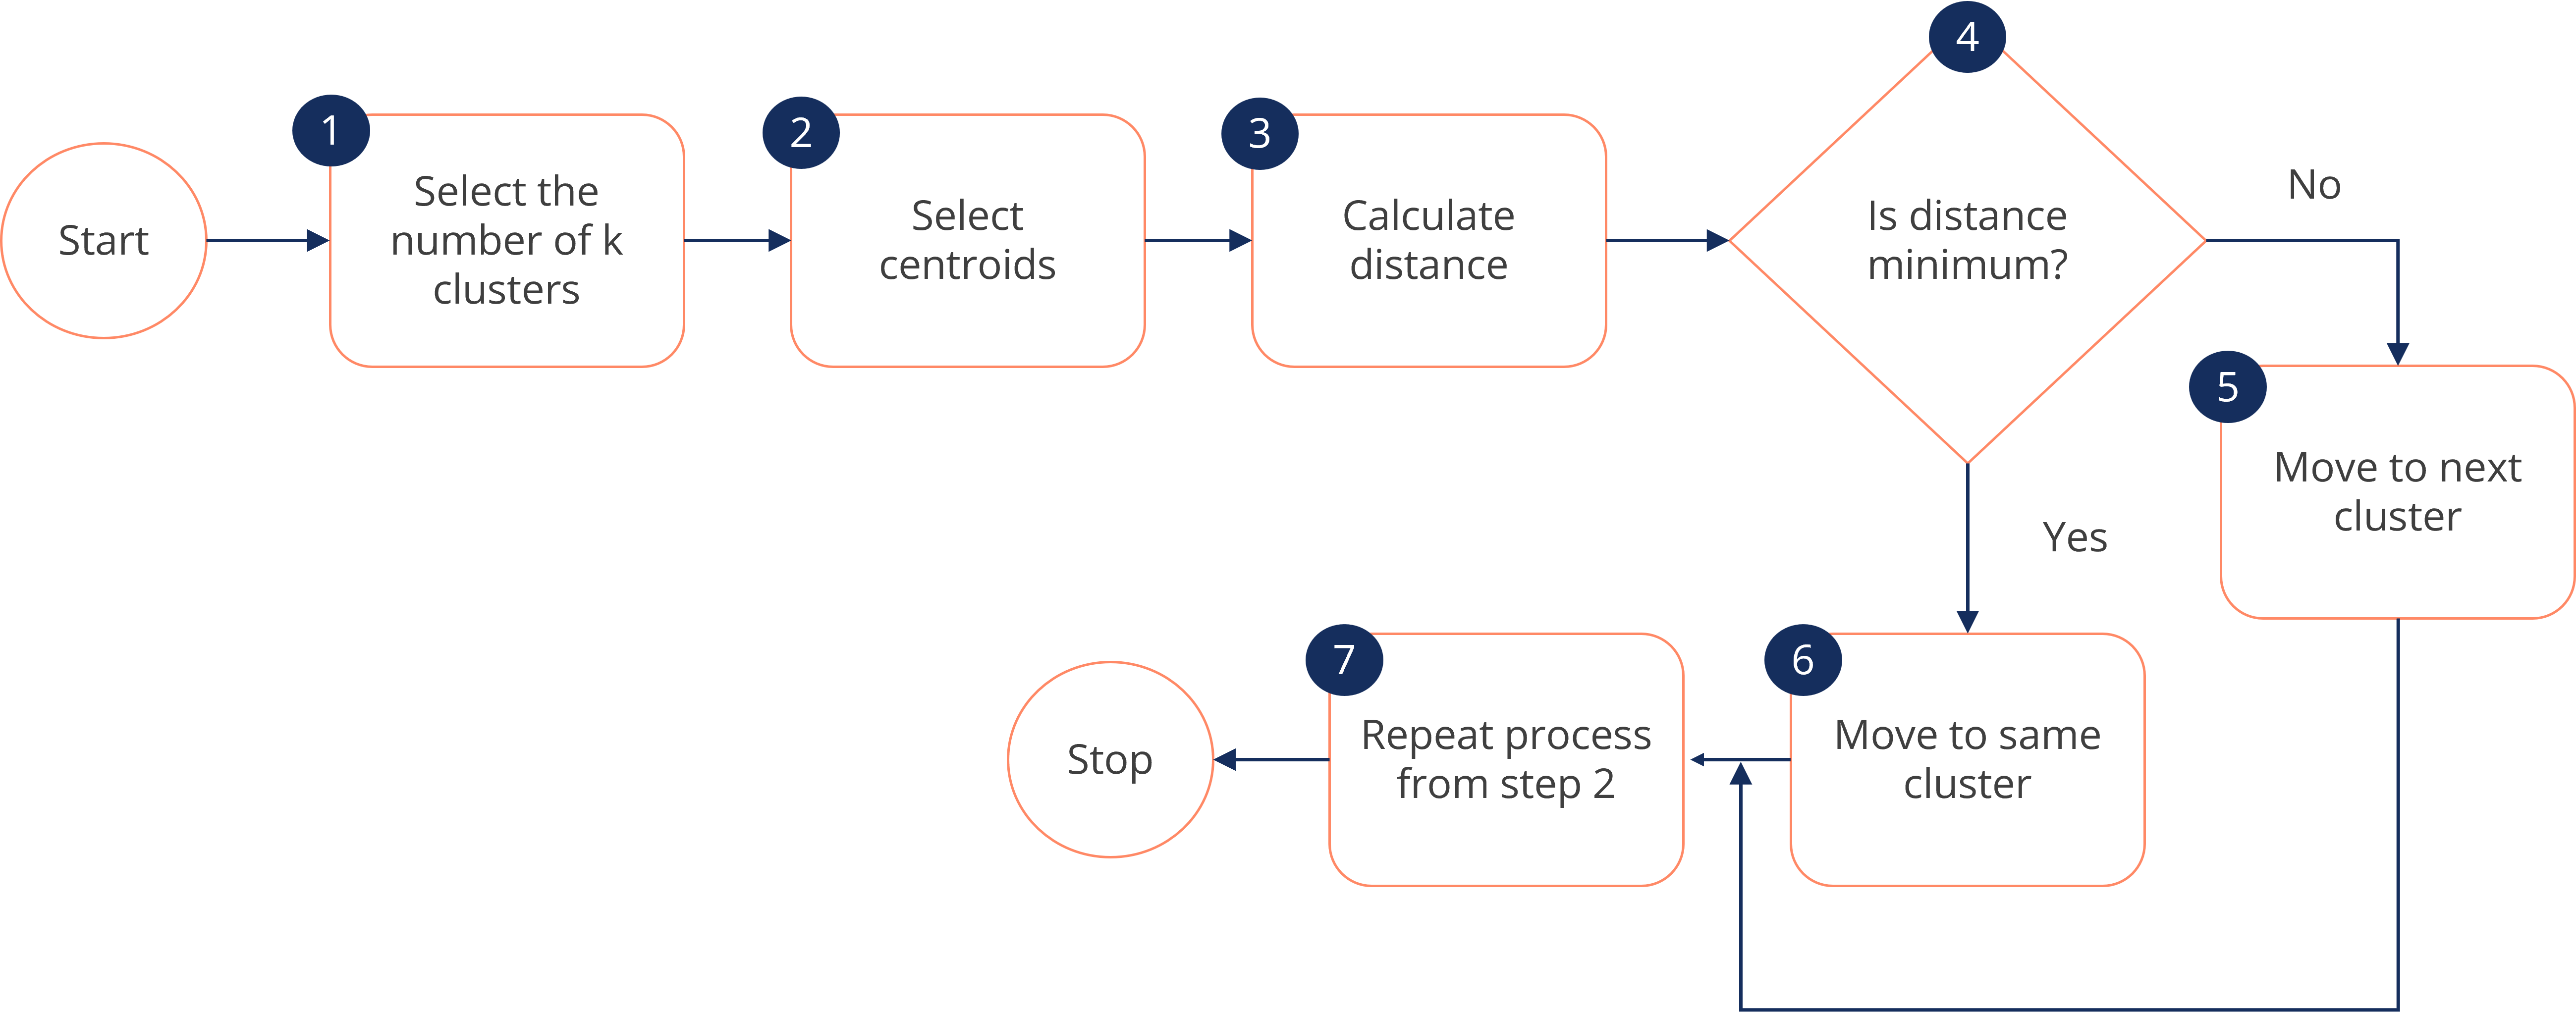

In [ ]:
!wget https://raw.githubusercontent.com/SimplyLearner/Dataset/master/Mall_customers.csv

--2024-08-24 17:06:11--  https://raw.githubusercontent.com/SimplyLearner/Dataset/master/Mall_customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3779 (3.7K) [text/plain]
Saving to: ‘Mall_customers.csv.1’

Mall_customers.csv. 100%[===================>]   3.69K  --.-KB/s    in 0s      

2024-08-24 17:06:11 (46.0 MB/s) - ‘Mall_customers.csv.1’ saved [3779/3779]



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Mall_customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
X = df[["Annual Income (k$)","Spending Score (1-100)" ]]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

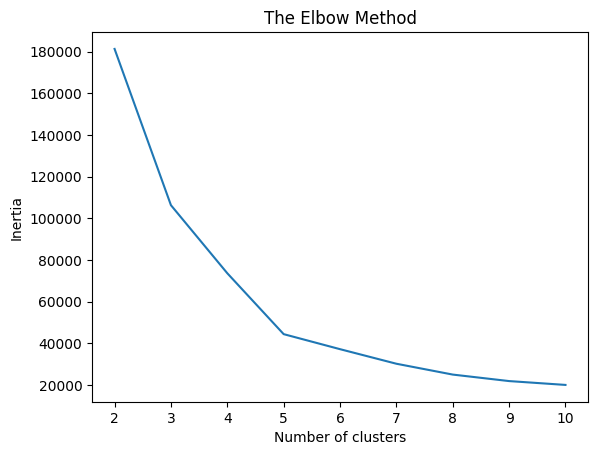

In [ ]:
inertia = []
score = []

for i in range(2,11):
  kmeans = KMeans(n_clusters=i,init="k-means++",random_state=42)
  kmeans.fit(X.values)
  score.append(silhouette_score(X.values,kmeans.fit_predict(X.values)))
  inertia.append(kmeans.inertia_)

plt.plot(range(2,11),inertia)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

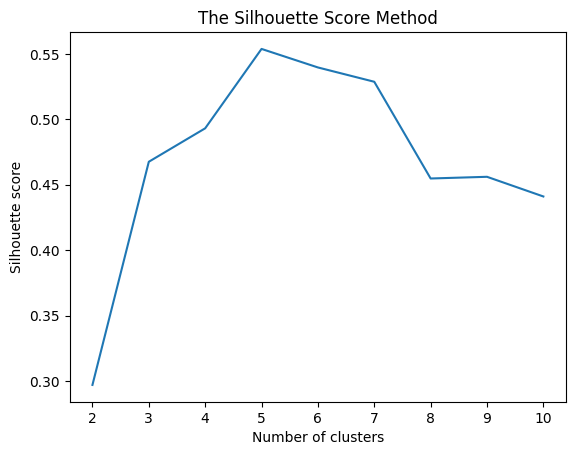

In [ ]:
# plot for silhouette score

plt.plot(range(2,11),score)
plt.title("The Silhouette Score Method")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

In [ ]:
model = KMeans(n_clusters=5)
y_pred = model.fit_predict(X.values)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
df["cluster"] = y_pred

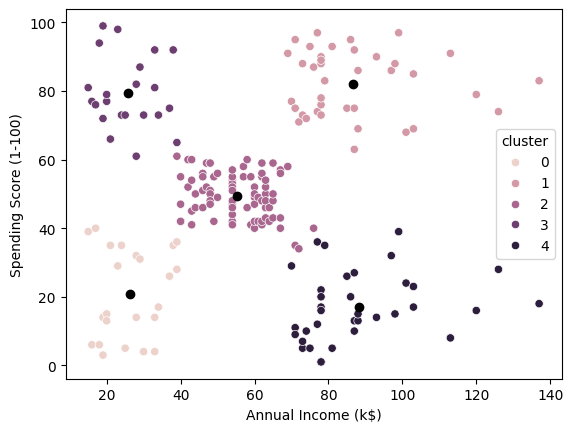

In [ ]:
import seaborn as sns

sns.scatterplot(data=df,x="Annual Income (k$)",y="Spending Score (1-100)",hue="cluster")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color="black")
plt.show()

# Hierarchical Clustering

In [1]:
!wget https://raw.githubusercontent.com/SimplyLearner/Dataset/master/Mall_customers.csv

--2024-08-25 13:52:47--  https://raw.githubusercontent.com/SimplyLearner/Dataset/master/Mall_customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3779 (3.7K) [text/plain]
Saving to: ‘Mall_customers.csv’

Mall_customers.csv  100%[===================>]   3.69K  --.-KB/s    in 0s      

2024-08-25 13:52:47 (52.7 MB/s) - ‘Mall_customers.csv’ saved [3779/3779]



In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("Mall_customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df1 = df.iloc[:50, 3:]
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


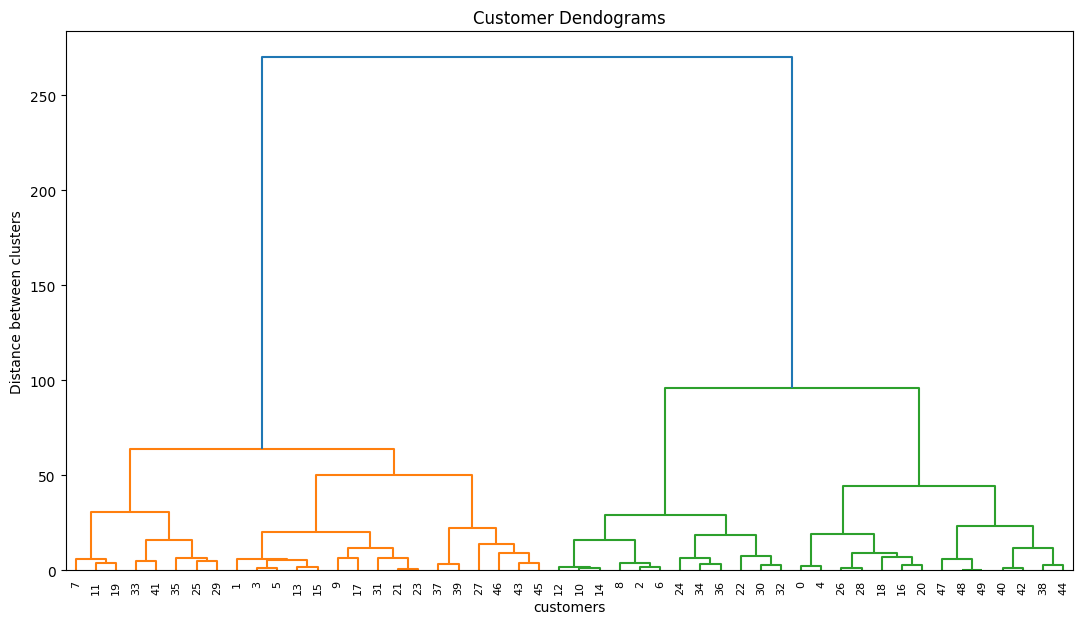

In [5]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(13, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(df1, method='ward'))
plt.xlabel("customers")
plt.ylabel("Distance between clusters")
plt.show()
#

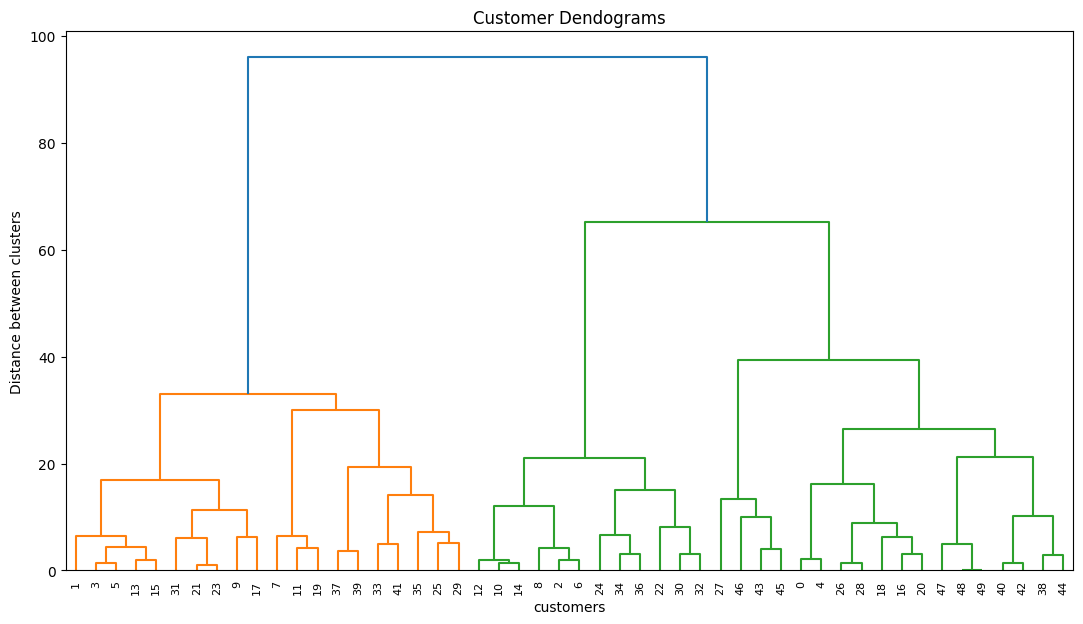

In [6]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(13, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(df1, method='complete'))
plt.xlabel("customers")
plt.ylabel("Distance between clusters")
plt.show()
#

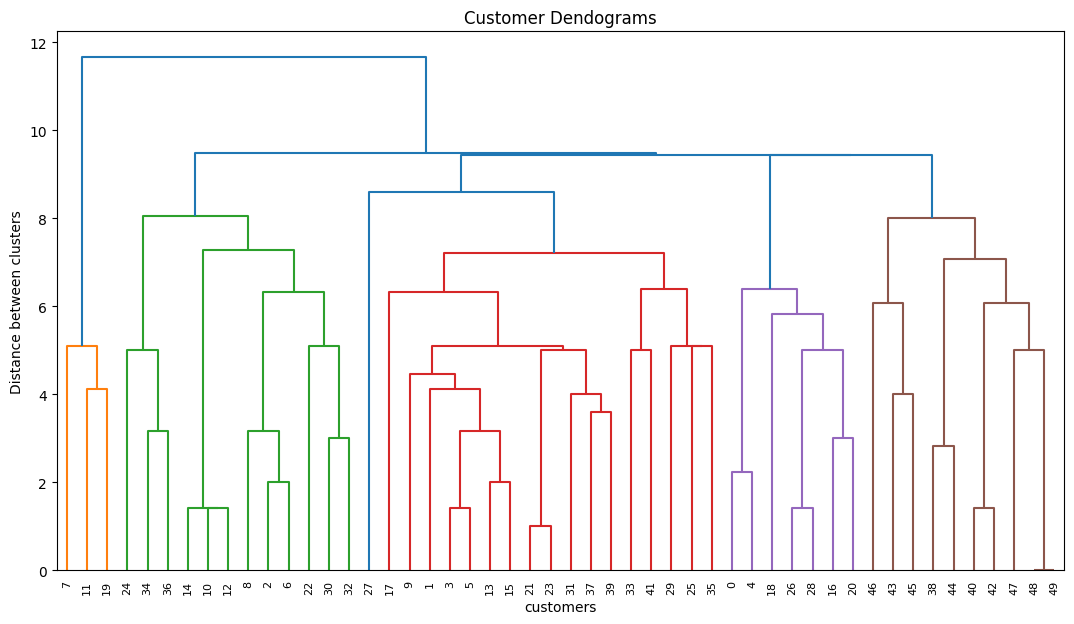

In [7]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(13, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(df1, method='single'))
plt.xlabel("customers")
plt.ylabel("Distance between clusters")
plt.show()
#

In [8]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_pred = model.fit_predict(df1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [9]:
y_pred

array([0, 4, 2, 4, 0, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 4, 0, 4, 0, 1, 0, 4,
       2, 4, 2, 1, 0, 3, 0, 1, 2, 4, 2, 1, 2, 1, 2, 3, 0, 3, 0, 1, 0, 3,
       0, 3, 3, 0, 0, 0])

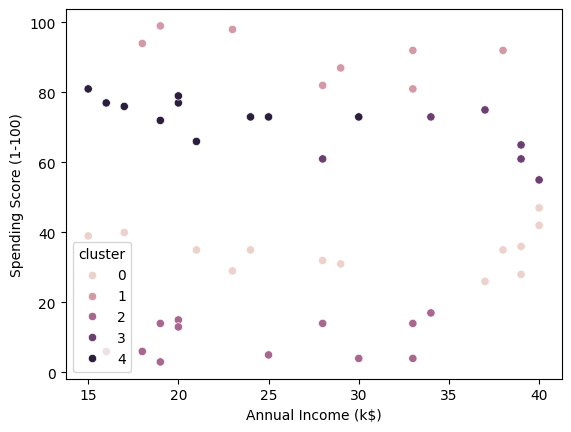

In [10]:
import seaborn as sns
df1['cluster'] = y_pred

sns.scatterplot(data=df1,x="Annual Income (k$)",y="Spending Score (1-100)",hue="cluster")
plt.show()

# Divisive Clustering

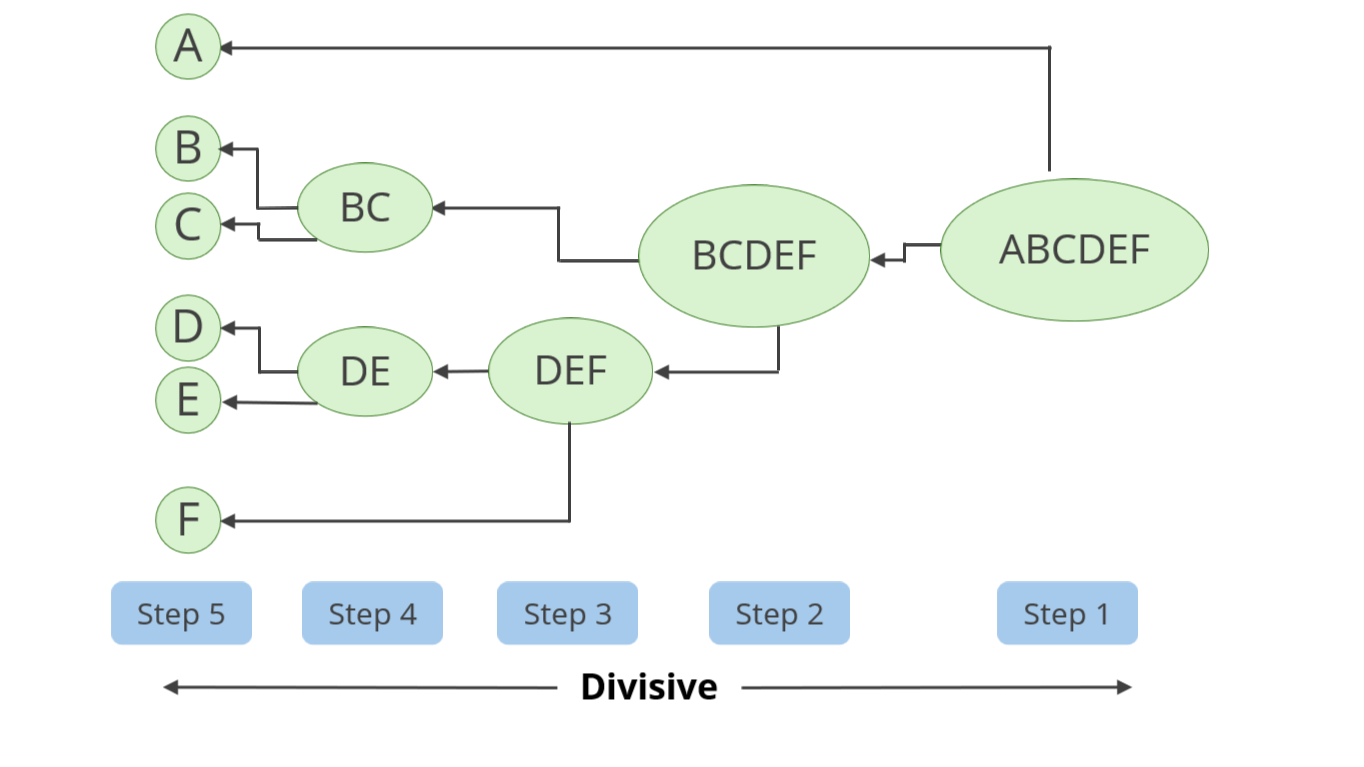

# DBScan Clustering
- Application : detecting the outlier
- When we want to identify the cluster which are not in spherical shape

- General idea : In order to consider it as a cluster, we have to find atleast minimum number of data points (min_samples) within selected radius (eps - epsilon)

In [12]:
from sklearn.model_selection import train_test_split
X = df[["Annual Income (k$)","Spending Score (1-100)" ]]

X_train,X_test = train_test_split(X,test_size=0.25,random_state=6)

In [13]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=5,min_samples=5)
dbscan.fit(X_train)
y_pred_train = dbscan.labels_

y_pred_test = dbscan.fit_predict(X_test)

In [14]:
y_pred_train

array([ 0,  1, -1, -1,  1, -1, -1, -1, -1, -1,  0,  0, -1,  0,  0, -1, -1,
       -1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1,
       -1, -1, -1,  1, -1,  1,  0, -1,  1,  1,  0, -1,  0,  2, -1, -1, -1,
       -1,  0,  0,  2,  0, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  0,
       -1, -1, -1, -1,  2,  0,  0, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  0,  2,  2, -1,  0,
       -1, -1,  0, -1,  1,  0, -1,  0, -1,  0,  0, -1, -1,  0,  2,  0,  0,
       -1, -1, -1, -1, -1,  1,  0, -1, -1, -1,  2, -1, -1, -1, -1,  0,  1,
       -1, -1, -1,  0,  0, -1, -1,  0,  0, -1,  0,  1,  1, -1])

In [15]:
y_pred_test

array([ 0, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  1, -1,  0, -1,
        0, -1, -1, -1, -1, -1, -1,  1,  0, -1,  0, -1, -1,  0,  0, -1, -1,
       -1, -1, -1, -1,  0, -1, -1, -1,  1,  0, -1, -1, -1,  0, -1,  1])

# PCA

In [16]:
!wget https://raw.githubusercontent.com/SimplyLearner/Dataset/master/diabetes.csv

--2024-08-25 14:47:33--  https://raw.githubusercontent.com/SimplyLearner/Dataset/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116042 (113K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>] 113.32K  --.-KB/s    in 0.02s   

2024-08-25 14:47:33 (4.52 MB/s) - ‘diabetes.csv’ saved [116042/116042]



In [24]:
df = pd.read_csv("diabetes.csv")
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,159.1,67.5,27.0,408.6,57.0,0.642,36.0,tested_negative
1,14.0,170.3,111.6,30.0,758.4,65.6,1.157,53.0,tested_positive
2,10.0,139.3,88.5,83.5,831.3,46.2,1.204,23.0,tested_positive
3,7.0,150.6,24.8,49.6,337.6,29.0,1.391,43.0,tested_positive
4,6.0,102.2,116.4,51.8,351.5,60.4,1.993,31.0,tested_positive


In [25]:
# Unsupervised learning
X = df.drop(columns=["class"])
y = df['class']

In [26]:
y = y.apply(lambda x: 1 if x == "tested_positive" else 0)
y.value_counts()

,count
class,
1,1008
0,992


In [27]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=6)

In [28]:
# standard scaler is preferred before PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Apply PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [30]:
X_train.shape

(1500, 8)

In [31]:
X_train_pca.shape

(1500, 8)

In [32]:
pca.explained_variance_ratio_

array([0.13574435, 0.13172339, 0.12907314, 0.12492525, 0.12310748,
       0.12217411, 0.11884112, 0.11441116])

In [33]:
np.sum(pca.explained_variance_ratio_)

0.9999999999999999

In [34]:
pca.explained_variance_ratio_[:5].sum()

0.6445736090867015

In [35]:
pca.explained_variance_ratio_[:6].sum()

0.7667477164685553

In [36]:
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [37]:
X_train_pca.shape

(1500, 6)

In [38]:
X_train_pca[:2]

array([[-0.44789683, -1.53925063, -0.03114997,  0.20011866, -1.54303799,
        -0.23775996],
       [ 0.42162905, -0.59848033, -0.32973899, -1.50671902,  1.93517838,
         1.35637269]])

In [39]:
X_train[:2]

array([[ 0.42987662,  0.66788466,  0.79841903, -1.24742182, -0.94324291,
         0.57193599, -1.28249811, -0.56000622],
       [-0.97320217, -1.38133295,  1.70829895,  1.50709059, -1.31244412,
        -0.92955077,  0.66340644,  0.3680527 ]])

# LDA
 - Assumes that features follow the Normal (Gaussian Distribution)
 - Assumes that data is linearly separable (classes can be separated)

In [40]:
y_train.value_counts()

,count
class,
1,751
0,749


In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train,y_train)
X_test_lda = lda.transform(X_test)

In [42]:
X_train_lda.shape

(1500, 1)

In [45]:
X_train_lda[:,0]

array([-1.02119696,  0.09819526, -0.41387505, ..., -0.74959619,
       -0.67223434,  0.36045411])

<Axes: >

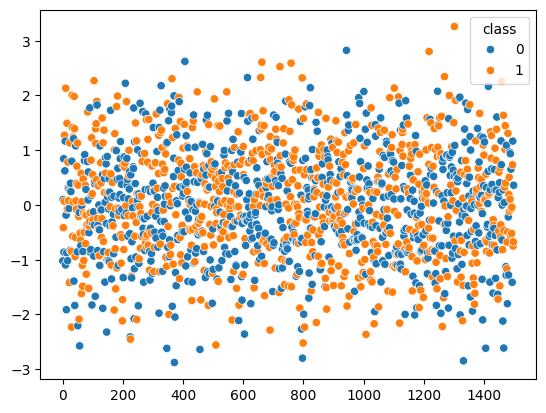

In [48]:
sns.scatterplot(x = range(len(X_train_lda)),y=X_train_lda[:,0],hue=y_train)

# TSNE
Used for visualization

In [49]:
!wget https://raw.githubusercontent.com/SimplyLearner/Dataset/master/mnist.csv

--2024-08-25 16:06:54--  https://raw.githubusercontent.com/SimplyLearner/Dataset/master/mnist.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18303650 (17M) [text/plain]
Saving to: ‘mnist.csv’

mnist.csv           100%[===================>]  17.46M  --.-KB/s    in 0.1s    

2024-08-25 16:06:55 (127 MB/s) - ‘mnist.csv’ saved [18303650/18303650]



In [50]:
df = pd.read_csv("mnist.csv")
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
y = df['label']
X = df.drop(columns=['label'])

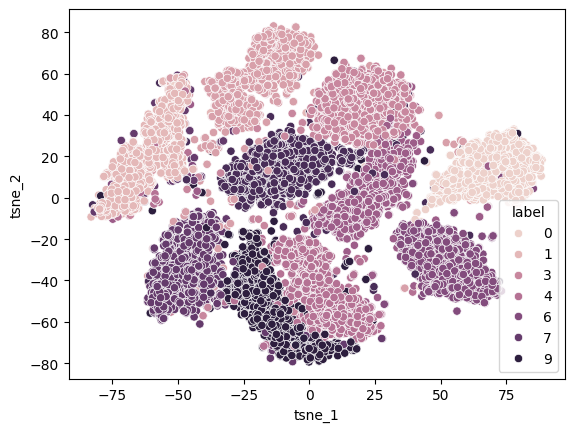

In [53]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0, n_iter=1000)
X_tsne = model.fit_transform(X)
tsne_df = pd.DataFrame(X_tsne, columns=['tsne_1', 'tsne_2'])

# change colormap
sns.set_palette('Set2')
sns.scatterplot(x='tsne_1', y='tsne_2', hue=y, data=tsne_df)
plt.show()